## Notebook for Developing Experiments on CovType Data Set

In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))

import scipy
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


from test_harness.datasets.dataset import Dataset
from test_harness.experiments.baseline_experiment import BaselineExperiment
from test_harness.experiments.topline_experiment import ToplineExperiment
from test_harness.experiments.response_uncertainty_experiment import (
    UncertaintyKSExperiment,
)
from test_harness.experiments.margin_uncertainty_experiment import (
    UncertaintyX2Experiment,
)
from test_harness.experiments.margin_threshold_experiment import (
    MarginThresholdExperiment,
)
from test_harness.utils.utils import (
    plot_experiment_error,
    plot_multiple_experiments,
    aggregate_experiment_metrics,
    plot_response_distributions_bysplit,
    plot_margin_distributions_bysplit,
    format_experimental_scores,
    calculate_split_window_distances,
)

%load_ext nb_black
%load_ext autoreload
%autoreload 2
%matplotlib inline

<IPython.core.display.Javascript object>

## Load Data

In [2]:
with open("../data/covtype_induced_drift_forward_norm.pkl", "rb") as f:
    drift_df, change_points = pickle.load(f)

with open("../data/covtype_induced_drift_forward_norm_reverse.pkl", "rb") as f:
    drift_df_reverse, change_points = pickle.load(f)

with open("../data/covtype_nodrift_norm.pkl", "rb") as f:
    nodrift_df = pickle.load(f)

<IPython.core.display.Javascript object>

## Experiments

### Prepare Test Harness

In [3]:
# specify columns and if categorical
col_names = [
    ("elevation", False),
    ("aspect", False),
    ("slope", False),
    ("horizontal_dist_to_hydrology", False),
    ("vertical_dist_to_hydrology", False),
    ("horizontal_dist_to_roadways", False),
    ("hillshade_9am", False),
    ("hillshade_noon", False),
    ("hillshade_3pm", False),
    ("horizontal_dist_to_fire_points", False),
]
wilderness_area_cols = [(f"wilderness_area_{i+1}", True) for i in range(4)]
col_names = col_names + wilderness_area_cols + [("cover_type", True)]

<IPython.core.display.Javascript object>

In [9]:
column_mapping = {
    "target": "cover_type",
    "numerical_features": [col for col, iscat in col_names if not iscat],
    "categorical_features": [col for col, iscat in col_names if iscat][:-1],
}

CT_dataset = Dataset(
    full_df=drift_df, column_mapping=column_mapping, window_size=17500 * 2
)

model = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=5)
# model = RandomForestClassifier(random_state=42)
param_grid = {"clf__n_estimators": [5], "clf__max_depth": [5]}

<IPython.core.display.Javascript object>

## Run

In [10]:
baseline = BaselineExperiment(model=model, dataset=CT_dataset, param_grid=param_grid)
baseline.run()

topline = ToplineExperiment(
    model=model, dataset=CT_dataset, k=10, param_grid=param_grid
)
topline.run()

uncertainty_ks = UncertaintyKSExperiment(
    model=model,
    dataset=CT_dataset,
    param_grid=param_grid,
    k=10,
    significance_thresh=0.001,
)
uncertainty_ks.run()

uncertainty_x2 = UncertaintyX2Experiment(
    model=model,
    dataset=CT_dataset,
    param_grid=param_grid,
    k=10,
    significance_thresh=0.001,
    margin_width=0.1,
)
uncertainty_x2.run()

margin_threshold_1 = MarginThresholdExperiment(
    model=model,
    dataset=CT_dataset,
    param_grid=param_grid,
    k=10,
    margin_width=0.1,
    sensitivity=1,
)
margin_threshold_1.run()

margin_threshold_2 = MarginThresholdExperiment(
    model=model,
    dataset=CT_dataset,
    param_grid=param_grid,
    k=10,
    margin_width=0.1,
    sensitivity=2,
)
margin_threshold_2.run()

GETTING REFERENCE DISTRIBUTION FOR WINDOW: 0
SELF MODEL: RandomForestClassifier(max_depth=5, n_estimators=5, random_state=42)
GETTING REFERENCE DISTRIBUTION FOR WINDOW: 1
SELF MODEL: RandomForestClassifier(max_depth=5, n_estimators=5, random_state=42)
GETTING REFERENCE DISTRIBUTION FOR WINDOW: 2
SELF MODEL: RandomForestClassifier(max_depth=5, n_estimators=5, random_state=42)
GETTING REFERENCE DISTRIBUTION FOR WINDOW: 3
SELF MODEL: RandomForestClassifier(max_depth=5, n_estimators=5, random_state=42)
GETTING REFERENCE DISTRIBUTION FOR WINDOW: 4
SELF MODEL: RandomForestClassifier(max_depth=5, n_estimators=5, random_state=42)
GETTING REFERENCE DISTRIBUTION FOR WINDOW: 5
SELF MODEL: RandomForestClassifier(max_depth=5, n_estimators=5, random_state=42)
GETTING REFERENCE DISTRIBUTION FOR WINDOW: 6
SELF MODEL: RandomForestClassifier(max_depth=5, n_estimators=5, random_state=42)
GETTING REFERENCE DISTRIBUTION FOR WINDOW: 7
SELF MODEL: RandomForestClassifier(max_depth=5, n_estimators=5, random_st

KS Test Result: FAILED | KstestResult(statistic=0.11202857142857148, pvalue=9.232413904383136e-192)

Dataset index of split end: 420000
GETTING REFERENCE DISTRIBUTION FOR WINDOW: 10
FINAL SHAPE kfold preds: (35000,)
GETTING DETECTION DISTRIBUTION FOR WINDOW: 11
Dataset Split: 11
REFERENCE STATS: DescribeResult(nobs=35000, minmax=(0.11850965865532284, 0.9510616874774003), mean=0.5707909794431401, variance=0.025319916871624458, skewness=-0.21843534397033704, kurtosis=-1.177415296043535)
DETECTION STATS: DescribeResult(nobs=35000, minmax=(0.09561257892754137, 0.9371176199597988), mean=0.5728863631145592, variance=0.023347979053194853, skewness=-0.12950798482567097, kurtosis=-1.1220734167117956)
KS Test Result: FAILED | KstestResult(statistic=0.04354285714285715, pvalue=2.8651212063397827e-29)

Dataset index of split end: 455000
GETTING REFERENCE DISTRIBUTION FOR WINDOW: 11
FINAL SHAPE kfold preds: (35000,)
GETTING DETECTION DISTRIBUTION FOR WINDOW: 12
Dataset Split: 12
REFERENCE STATS: De

GETTING DETECTION DISTRIBUTION FOR WINDOW: 8
Significant Change in Margin Density: False
Change in MD: 0.023428571428571437
Sensitivity: 1 | Ref_SD: 0.037424383626132283 | Threshold: 0.037424383626132283

Dataset index of split end: 350000
GETTING DETECTION DISTRIBUTION FOR WINDOW: 9
Significant Change in Margin Density: False
Change in MD: 0.022800000000000015
Sensitivity: 1 | Ref_SD: 0.037424383626132283 | Threshold: 0.037424383626132283

Dataset index of split end: 385000
GETTING DETECTION DISTRIBUTION FOR WINDOW: 10
Significant Change in Margin Density: False
Change in MD: 0.004799999999999971
Sensitivity: 1 | Ref_SD: 0.037424383626132283 | Threshold: 0.037424383626132283

Dataset index of split end: 420000
GETTING DETECTION DISTRIBUTION FOR WINDOW: 11
Significant Change in Margin Density: True
Change in MD: 0.04685714285714285
Sensitivity: 1 | Ref_SD: 0.037424383626132283 | Threshold: 0.037424383626132283

Dataset index of split end: 455000
GETTING REFERENCE DISTRIBUTION FOR WINDO

<IPython.core.display.Javascript object>

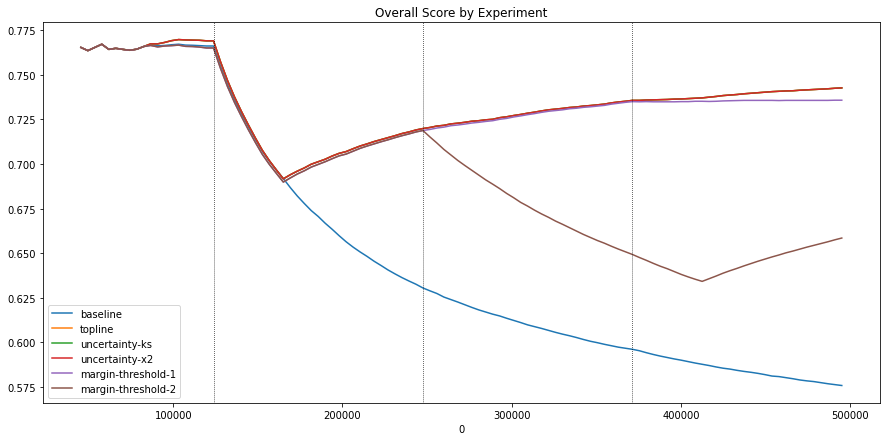

,drifts_signaled,actual_drift_occurences,false_positives,false_negatives,percent_total_labels,cumulative_accuracy,total_train_time
experiment,,,,,,,
baseline,0,0,0,0,0.0833,0.5758,0.12
topline,11,1,10,0,1.0000,0.7427,1.36
uncertainty-ks,11,1,10,0,1.0000,0.7427,1.40
uncertainty-x2,11,1,10,0,1.0000,0.7427,1.39
margin-threshold-1,5,7,1,3,0.5000,0.7358,0.71
margin-threshold-2,5,9,0,4,0.5000,0.6585,0.70


<IPython.core.display.Javascript object>

In [7]:
# 41261

exps = [
    baseline,
    topline,
    uncertainty_ks,
    uncertainty_x2,
    margin_threshold_1,
    margin_threshold_2,
]
plot_multiple_experiments(exps, change_points)
aggregate_experiment_metrics(exps)

In [10]:
uncertainty_ks.drift_occurences

[False, False, True, False, False, False, False, False, False, False, False]

<IPython.core.display.Javascript object>

In [12]:
uncertainty_ks.drift_signals

[True, True, True, True, True, True, True, True, True, True, True]

<IPython.core.display.Javascript object>

In [13]:
margin_threshold_1.drift_occurences

[False, False, True, True, True, False, True, False, True, True, True]

<IPython.core.display.Javascript object>

In [6]:
margin_threshold_1.drift_signals

[False, False, True, True, True, True, True, False, False, False, False]

<IPython.core.display.Javascript object>

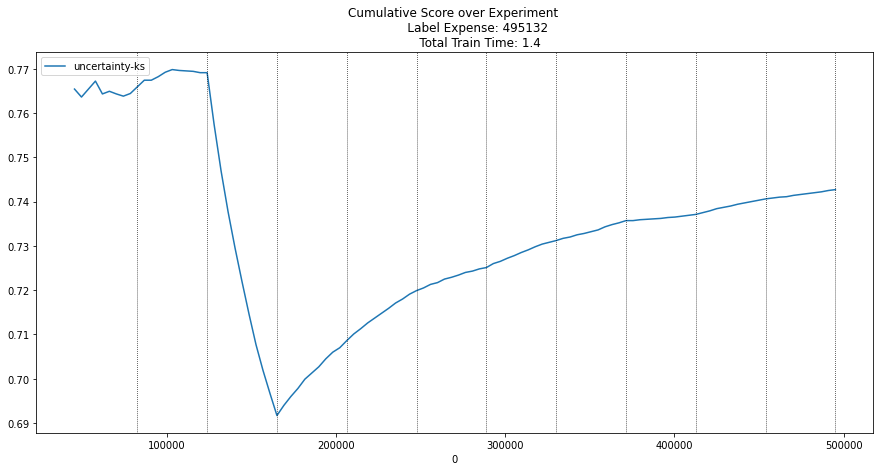

<IPython.core.display.Javascript object>

In [11]:
plot_experiment_error(uncertainty_ks)

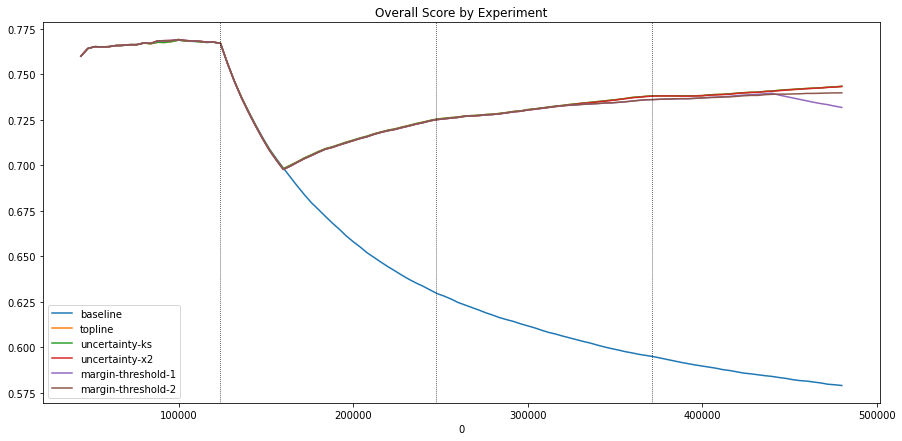

,drifts_signaled,actual_drift_occurences,false_positives,false_negatives,percent_total_labels,cumulative_accuracy,total_train_time
experiment,,,,,,,
baseline,0,0,0,0,0.0808,0.5789,0.11
topline,11,1,10,0,0.9694,0.7434,1.32
uncertainty-ks,11,1,10,0,0.9694,0.7434,1.36
uncertainty-x2,8,4,4,0,0.7271,0.7433,1.03
margin-threshold-1,5,5,2,2,0.4847,0.7318,0.67
margin-threshold-2,4,3,1,0,0.4039,0.7398,0.56


<IPython.core.display.Javascript object>

In [39]:
# 20000*2

exps = [
    baseline,
    topline,
    uncertainty_ks,
    uncertainty_x2,
    margin_threshold_1,
    margin_threshold_2,
]
plot_multiple_experiments(exps, change_points)
aggregate_experiment_metrics(exps)

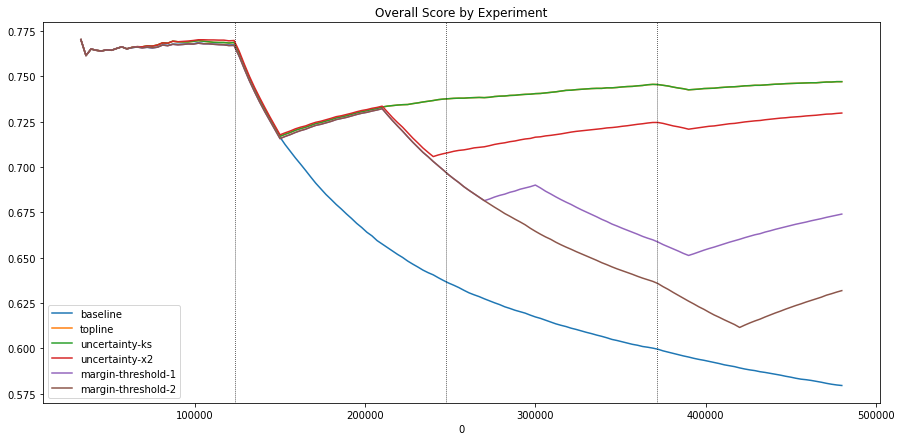

,drifts_signaled,actual_drift_occurences,false_positives,false_negatives,percent_total_labels,cumulative_accuracy,total_train_time
experiment,,,,,,,
baseline,0,0,0,0,0.0606,0.5796,0.09
topline,15,2,13,0,0.9694,0.7471,1.41
uncertainty-ks,15,2,13,0,0.9694,0.7471,1.38
uncertainty-x2,9,8,2,1,0.6059,0.7298,0.85
margin-threshold-1,6,12,0,6,0.4241,0.6741,0.59
margin-threshold-2,5,12,0,7,0.3635,0.6319,0.52


<IPython.core.display.Javascript object>

In [36]:
# 15000*2

exps = [
    baseline,
    topline,
    uncertainty_ks,
    uncertainty_x2,
    margin_threshold_1,
    margin_threshold_2,
]
plot_multiple_experiments(exps, change_points)
aggregate_experiment_metrics(exps)

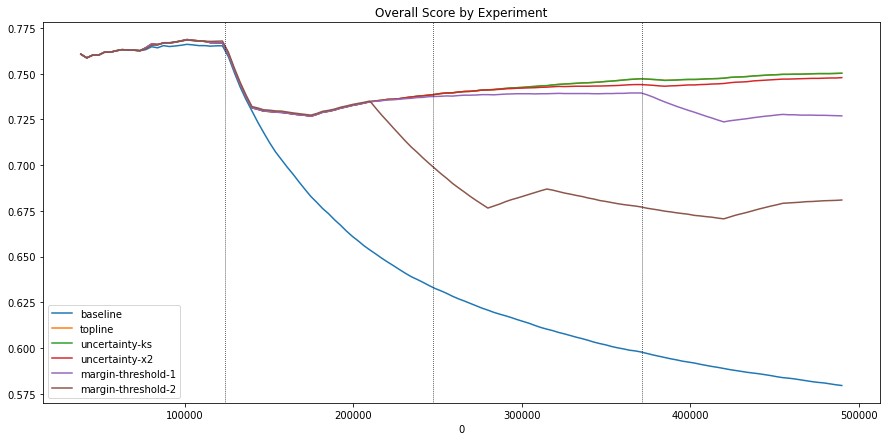

,drifts_signaled,actual_drift_occurences,false_positives,false_negatives,percent_total_labels,cumulative_accuracy,total_train_time
experiment,,,,,,,
baseline,0,0,0,0,0.0707,0.5795,0.10
topline,13,3,10,0,0.9896,0.7502,1.43
uncertainty-ks,13,3,10,0,0.9896,0.7502,1.45
uncertainty-x2,10,6,4,0,0.7776,0.7478,1.08
margin-threshold-1,5,6,2,3,0.4241,0.7269,0.59
margin-threshold-2,4,11,0,7,0.3534,0.6809,0.51


<IPython.core.display.Javascript object>

In [26]:
# 17500*2
exps = [
    baseline,
    topline,
    uncertainty_ks,
    uncertainty_x2,
    margin_threshold_1,
    margin_threshold_2,
]
plot_multiple_experiments(exps, change_points)
aggregate_experiment_metrics(exps)

In [24]:
drift_df.shape

(495141, 15)

<IPython.core.display.Javascript object>

In [23]:
change_points

[0, 123785, 247570, 371355]

<IPython.core.display.Javascript object>

In [16]:
margin_threshold_1.dataset.splits

[35000,
 70000,
 105000,
 140000,
 175000,
 210000,
 245000,
 280000,
 315000,
 350000,
 385000,
 420000,
 455000,
 490000]

<IPython.core.display.Javascript object>

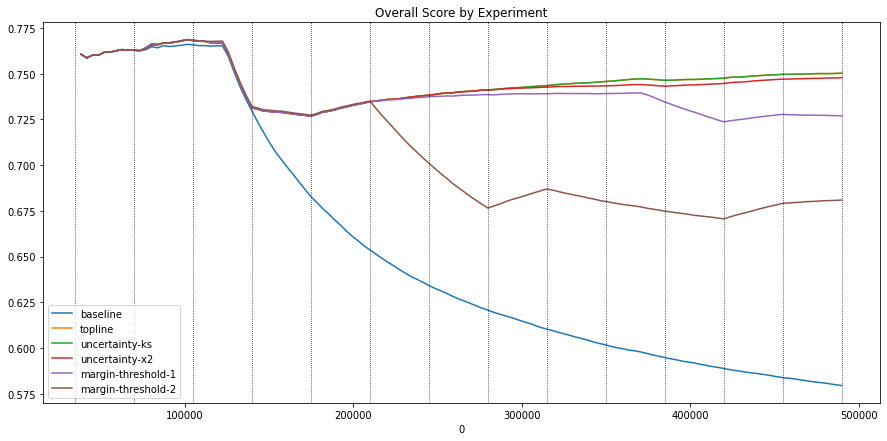

,drifts_signaled,actual_drift_occurences,false_positives,false_negatives,percent_total_labels,cumulative_accuracy,total_train_time
experiment,,,,,,,
baseline,0,0,0,0,0.0707,0.5795,0.11
topline,13,3,10,0,0.9896,0.7502,1.48
uncertainty-ks,13,3,10,0,0.9896,0.7502,1.53
uncertainty-x2,10,6,4,0,0.7776,0.7478,1.16
margin-threshold-1,5,6,2,3,0.4241,0.7269,0.67
margin-threshold-2,4,11,0,7,0.3534,0.6809,0.52


<IPython.core.display.Javascript object>

In [17]:
exps = [
    baseline,
    topline,
    uncertainty_ks,
    uncertainty_x2,
    margin_threshold_1,
    margin_threshold_2,
]
plot_multiple_experiments(exps, margin_threshold_1.dataset.splits)
aggregate_experiment_metrics(exps)

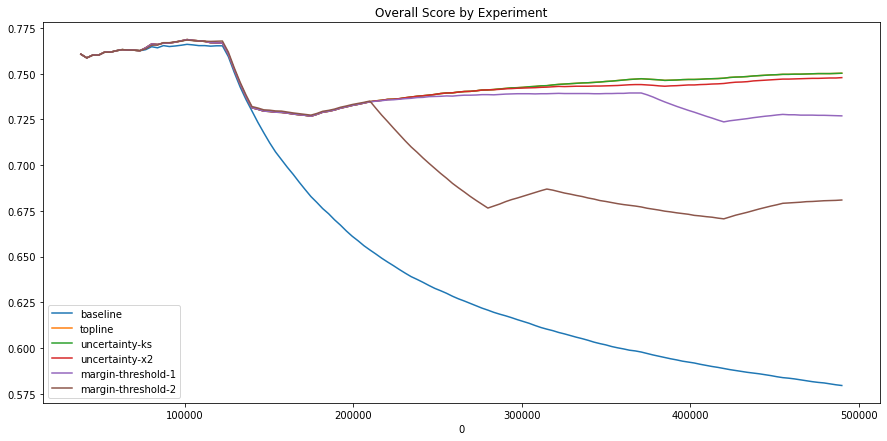

,drifts_signaled,actual_drift_occurences,false_positives,false_negatives,percent_total_labels,cumulative_accuracy,total_train_time
experiment,,,,,,,
baseline,0,0,0,0,0.0707,0.5795,0.11
topline,13,3,10,0,0.9896,0.7502,1.48
uncertainty-ks,13,3,10,0,0.9896,0.7502,1.53
uncertainty-x2,10,6,4,0,0.7776,0.7478,1.16
margin-threshold-1,5,6,2,3,0.4241,0.7269,0.67
margin-threshold-2,4,11,0,7,0.3534,0.6809,0.52


<IPython.core.display.Javascript object>

In [22]:
exps = [
    baseline,
    topline,
    uncertainty_ks,
    uncertainty_x2,
    margin_threshold_1,
    margin_threshold_2,
]
plot_multiple_experiments(exps)
aggregate_experiment_metrics(exps)

In [15]:
change_points

[0, 123785, 247570, 371355]

<IPython.core.display.Javascript object>

In [20]:
print(margin_threshold_1.drift_occurences)

[False, False, True, True, False, False, False, False, False, True, True, True, True]


<IPython.core.display.Javascript object>

In [21]:
print(margin_threshold_1.drift_signals)

[True, True, True, True, False, False, False, False, False, False, True, False, False]


<IPython.core.display.Javascript object>

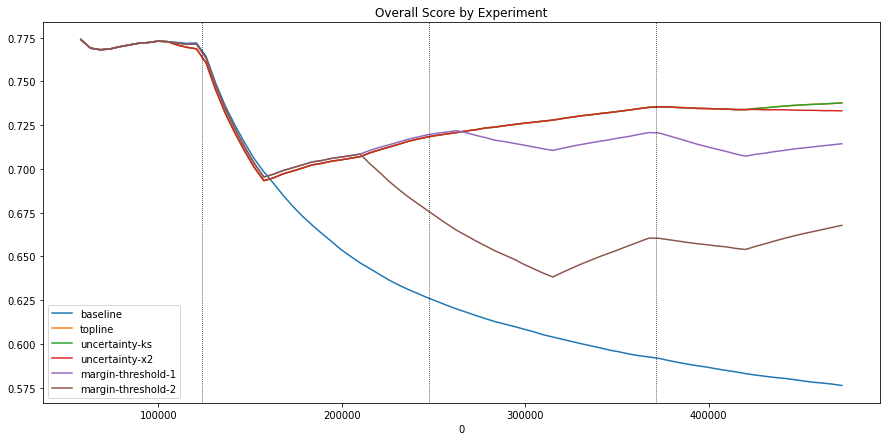

,drifts_signaled,actual_drift_occurences,false_positives,false_negatives,percent_total_labels,cumulative_accuracy,total_train_time
experiment,,,,,,,
baseline,0,0,0,0,0.1060,0.5763,0.15
topline,8,2,6,0,0.9543,0.7377,1.23
uncertainty-ks,8,2,6,0,0.9543,0.7377,1.24
uncertainty-x2,6,3,5,2,0.7422,0.7332,0.98
margin-threshold-1,5,7,0,2,0.6362,0.7144,0.82
margin-threshold-2,3,7,0,4,0.4241,0.6678,0.55


<IPython.core.display.Javascript object>

In [23]:
# 17500*3
exps = [
    baseline,
    topline,
    uncertainty_ks,
    uncertainty_x2,
    margin_threshold_1,
    margin_threshold_2,
]
plot_multiple_experiments(exps, change_points)
aggregate_experiment_metrics(exps)

In [19]:
margin_threshold.false_negatives

[False, False, True, False, False, True, False, True]

<IPython.core.display.Javascript object>

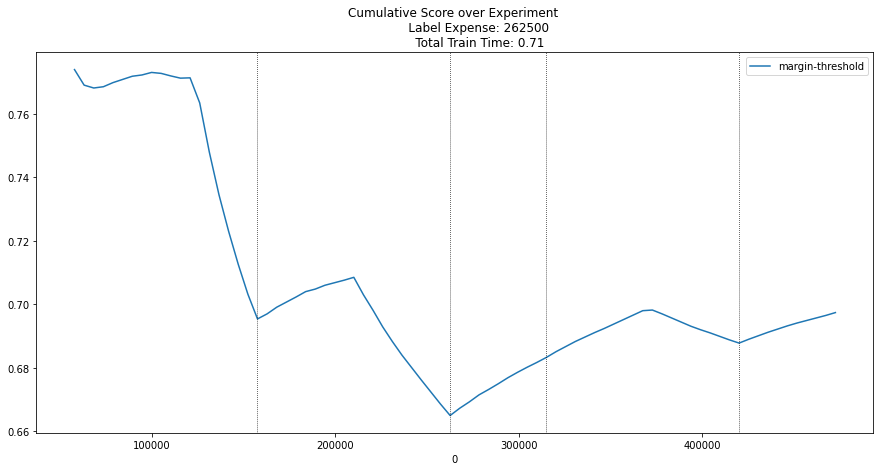

<IPython.core.display.Javascript object>

In [17]:
plot_experiment_error(margin_threshold)

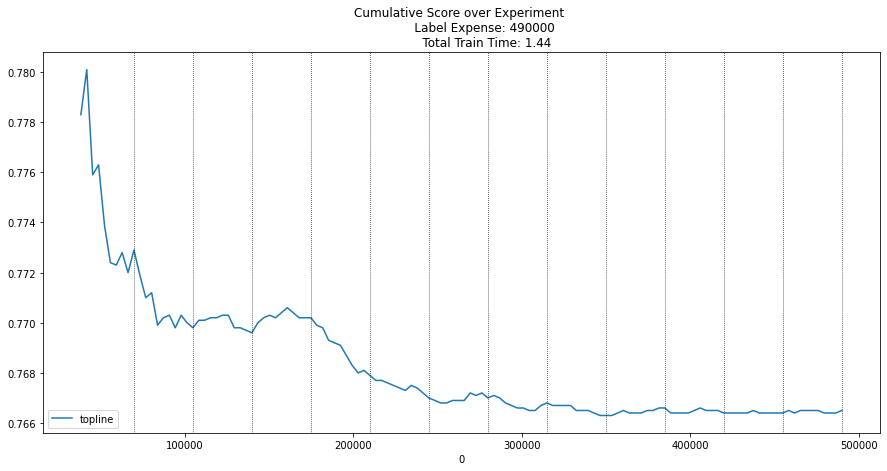

<IPython.core.display.Javascript object>

In [9]:
plot_experiment_error(topline)

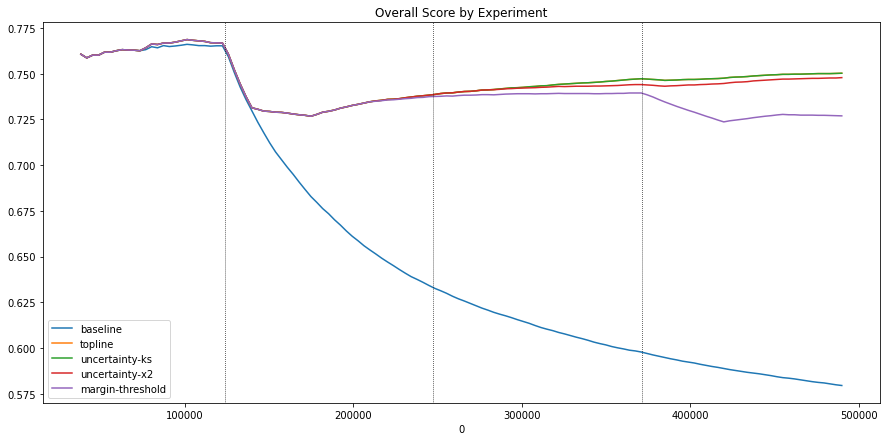

,drifts_signaled,actual_drift_occurences,false_positives,false_negatives,percent_total_labels,cumulative_accuracy,total_train_time
experiment,,,,,,,
baseline,0,0,0,0,0.0707,0.5795,0.10
topline,13,3,10,0,0.9896,0.7502,1.39
uncertainty-ks,13,3,10,0,0.9896,0.7502,1.48
uncertainty-x2,10,6,4,0,0.7776,0.7478,1.09
margin-threshold,5,6,2,3,0.4241,0.7269,0.61


<IPython.core.display.Javascript object>

In [18]:
exps = [baseline, topline, uncertainty_ks, uncertainty_x2, margin_threshold]
# exps = [baseline]
plot_multiple_experiments(exps, change_points)
aggregate_experiment_metrics(exps)

### Uncertainty KS Debug

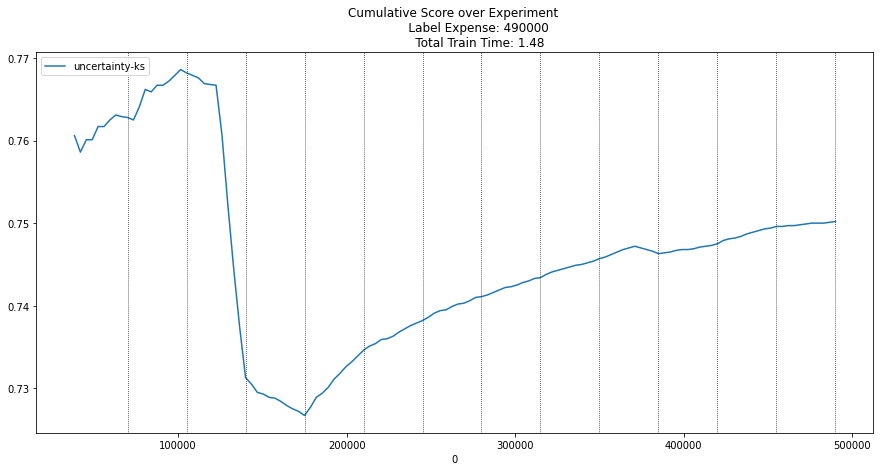

<IPython.core.display.Javascript object>

In [20]:
plot_experiment_error(uncertainty_ks)

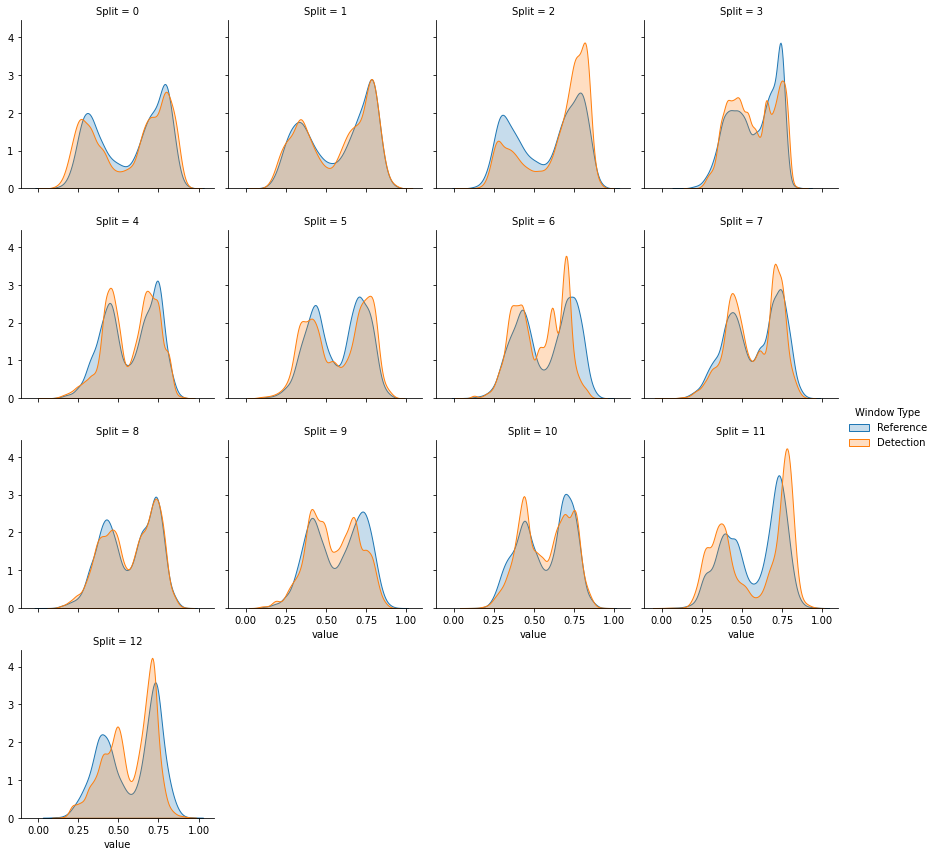

<IPython.core.display.Javascript object>

In [21]:
plot_response_distributions_bysplit(uncertainty_ks)

### Margin Uncertainty Debug

Same Distribution: False
Expected Distribution: [0.9336, 0.0664]
Observed Distribution: [0.9536857142857142, 0.04631428571428572]
Percent change in margin: 0.3025
Number in Margin: Before 2324 | After 1621 | Difference 703
Chi-Square Results: Power_divergenceResult(statistic=227.77900068876315, pvalue=1.818509239916743e-51)

Same Distribution: False
Expected Distribution: [0.9271142857142857, 0.07288571428571429]
Observed Distribution: [0.9425714285714286, 0.057428571428571426]
Percent change in margin: 0.2121
Number in Margin: Before 2551 | After 2010 | Difference 541
Chi-Square Results: Power_divergenceResult(statistic=123.75159311299453, pvalue=9.547869430704045e-29)

Same Distribution: False
Expected Distribution: [0.9250285714285714, 0.07497142857142858]
Observed Distribution: [0.952, 0.048]
Percent change in margin: 0.3598
Number in Margin: Before 2624 | After 1680 | Difference 944
Chi-Square Results: Power_divergenceResult(statistic=367.13434221073123, pvalue=7.873051724600469e-

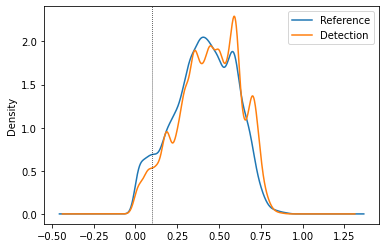

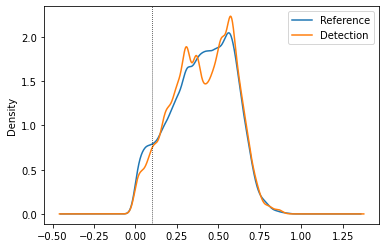

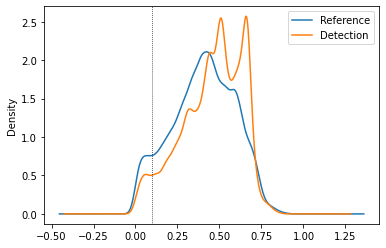

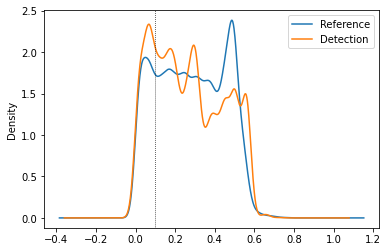

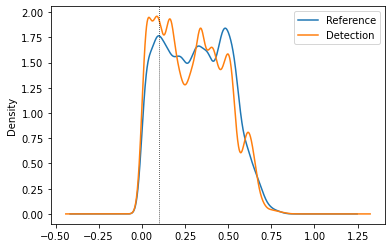

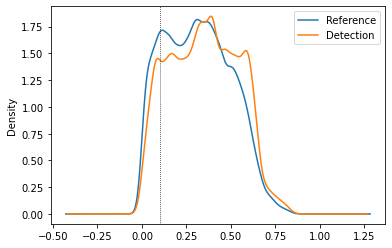

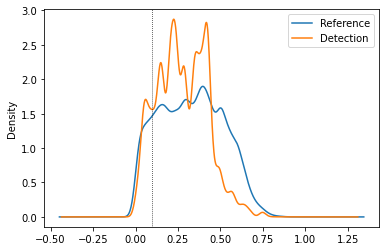

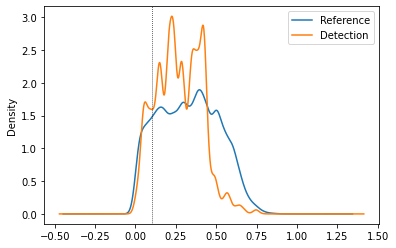

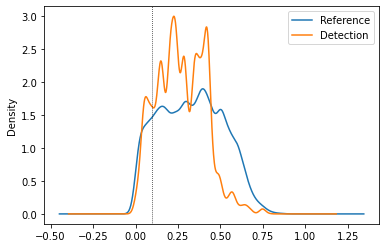

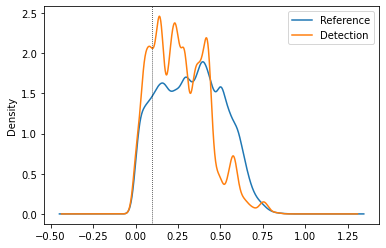

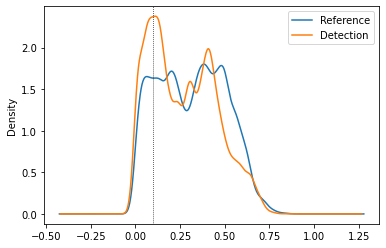

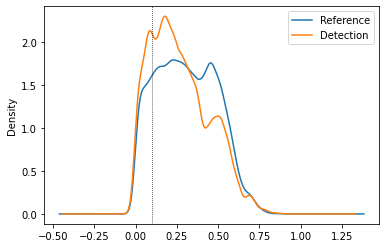

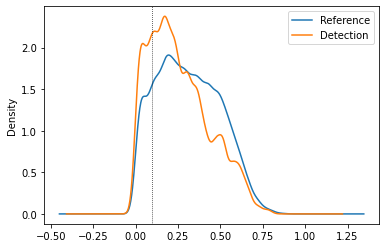

<IPython.core.display.Javascript object>

In [22]:
plot_margin_distributions_bysplit(uncertainty_x2)

### KS Test Deep Dive

#### What is minimum reference window size for passing KS test?

Let's see what window size is needed to pass a KS test on the original dataset that has NO drift in it.

In [16]:
with open("../data/covtype_nodrift_norm.pkl", "rb") as f:
    nodrift_df = pickle.load(f)

nodrift_df = nodrift_df.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [17]:
CT_nodrift_dataset = Dataset(
    full_df=nodrift_df, column_mapping=column_mapping, window_size=17500 * 5
)

uncertainty_ks_nodrift = UncertaintyKSExperiment(
    model=model,
    dataset=CT_nodrift_dataset,
    param_grid=param_grid,
    k=10,
    significance_thresh=0.001,
)
uncertainty_ks_nodrift.run()

Dataset index of split end: 175000
GETTING REFERENCE DISTRIBUTION FOR WINDOW: 0
FINAL SHAPE kfold preds: (87500,)
GETTING DETECTION DISTRIBUTION FOR WINDOW: 1
Dataset Split: 1
REFERENCE STATS: DescribeResult(nobs=87500, minmax=(0.032193791525880186, 0.9724893662797204), mean=0.7516638984855206, variance=0.033471435872981806, skewness=-1.6389016246620909, kurtosis=2.2131196103113)
DETECTION STATS: DescribeResult(nobs=87500, minmax=(0.03886641455298461, 0.9468216440391476), mean=0.6888595953217463, variance=0.03509333129193129, skewness=-0.8578697020467307, kurtosis=-0.24111834363301332)
KS Test Result: FAILED | KstestResult(statistic=0.21412571428571425, pvalue=0.0)

Dataset index of split end: 262500
GETTING REFERENCE DISTRIBUTION FOR WINDOW: 1
FINAL SHAPE kfold preds: (87500,)
GETTING DETECTION DISTRIBUTION FOR WINDOW: 2
Dataset Split: 2
REFERENCE STATS: DescribeResult(nobs=87500, minmax=(0.01697645055203195, 0.9674733336164059), mean=0.6989032305963607, variance=0.04027513453777968, 

<IPython.core.display.Javascript object>

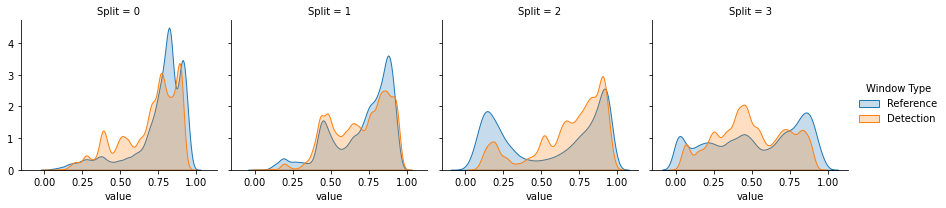

<IPython.core.display.Javascript object>

In [18]:
plot_response_distributions_bysplit(uncertainty_ks_nodrift)

#### It looks like Kologorov-Smirnov is too sensitive/strict for our use case

"A test has told you that two samples aren't from literally identical populations, but that's not what you actually care about. What you actually care about is up to you; it sounds like you care about how different the populations are. The solution is not to try to transform 𝑝-values ("when all you have is a hammer", etc.) but to use a more appropriate technique."

Even with the non-drifting dataset and huge windows, KS tests are too sensitive.

### Distance Metrics instead of KS test?

Maybe we could try calculating a distance instead of applying a check yes-no hypothesis test. The drawback here is that using distances requires us to then tune a threshold that indicates what level of distance is deemed acceptable - another hyperparameter to tune

In [19]:
calculate_split_window_distances(sqsi_mr, scipy.stats.entropy)

NameError: name 'sqsi_mr' is not defined

<IPython.core.display.Javascript object>

In [ ]:
calculate_distances_window_distances(sqsi_mr, scipy.stats.wasserstein_distance)

In [ ]:
calculate_distances_window_distances(sqsi_mr, scipy.spatial.distance.jensenshannon)

### Margin Uncertainty Approach with Chi-Squared Test

In [ ]:
CT_nodrift_dataset = Dataset(
    full_df=nodrift_df, column_mapping=column_mapping, window_size=17500 * 3
)

uncertainty_x2_nodrift = UncertaintyX2Experiment(
    model=model,
    dataset=CT_nodrift_dataset,
    param_grid=param_grid,
    k=10,
    significance_thresh=0.001,
    margin_width=0.1,
)
uncertainty_x2_nodrift.run()

In [ ]:
plot_margin_distributions_bysplit(uncertainty_x2_nodrift)

- Null Hypothesis (H0): Observed data follow the expected distribution
- Alternative Hypothesis (HA): Observed data do NOT follow the expected distribution
    
If p_value is less than 0.05, reject null hypothesis --> They are from different distributions

### Margin Uncertainty Approach with Sensitivity Threshold

In [ ]:
CT_dataset = Dataset(
    full_df=drift_df, column_mapping=column_mapping, window_size=17500 * 2
)

margin_threshold_dev = MarginThresholdExperiment(
    model=model,
    dataset=CT_dataset,
    param_grid=param_grid,
    k=10,
    margin_width=0.1,
    sensitivity=1,
)
margin_threshold_dev.run()

In [ ]:
margin_threshold_dev.drift_signals